# Benchmark the Flooding test function

In [1]:
import openturns as ot
import otbenchmark as otb
import openturns.viewer as otv

In [2]:
problem = otb.FloodingSensitivity()

In [3]:
print(problem)

name = Flooding
distribution = ComposedDistribution(TruncatedDistribution(Gumbel(beta = 558, gamma = 1013), bounds = [0, (19000.8) +inf[), TruncatedDistribution(Normal(mu = 30, sigma = 7.5), bounds = [0, (87.3797) +inf[), Uniform(a = 49, b = 51), Uniform(a = 54, b = 56), Uniform(a = 7, b = 9), Triangular(a = 55, m = 55.5, b = 56), Triangular(a = 4990, m = 5000, b = 5010), Triangular(a = 295, m = 300, b = 305), IndependentCopula(dimension = 8))
function = [Q,Ks,Zv,Zm,Hd,Zb,L,B]->[(Q / (Ks * B * sqrt((Zm - Zv) / L)))^(3.0 / 5.0) + Zv - Zb - Hd]
firstOrderIndices = [0.38,0.13,0.25,0,0.19,0.02,0,0]
totalOrderIndices = [0.4,0.15,0.25,0.01,0.19,0.02,0,0]


In [4]:
distribution = problem.getInputDistribution()
model = problem.getFunction()

In [5]:
# Exact first and total order
exact_first_order = problem.getFirstOrderIndices()
exact_first_order

class=Point name=Unnamed dimension=8 values=[0.38,0.13,0.25,0,0.19,0.02,0,0]

In [6]:
exact_total_order = problem.getTotalOrderIndices()
exact_total_order

class=Point name=Unnamed dimension=8 values=[0.4,0.15,0.25,0.01,0.19,0.02,0,0]

## Plot the function

In [7]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 200
inputDesign = ot.MonteCarloExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [8]:
dimension = distribution.getDimension()
full_sample = ot.Sample(size, 1 + dimension)
full_sample[:, range(dimension)] = inputDesign
full_sample[:, dimension] = outputDesign
full_description = list(inputDesign.getDescription())
full_description.append(outputDesign.getDescription()[0])
full_sample.setDescription(full_description)

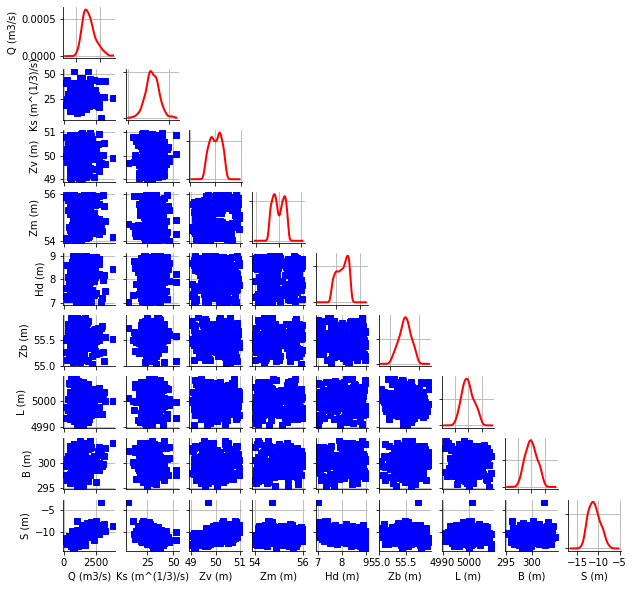

In [9]:
marginal_distribution = ot.ComposedDistribution(
    [
        ot.KernelSmoothing().build(full_sample.getMarginal(i))
        for i in range(1 + dimension)
    ]
)
clouds = ot.VisualTest.DrawPairsMarginals(full_sample, marginal_distribution)
view = otv.View(clouds, figure_kw={"figsize": (10.0, 10.0)})

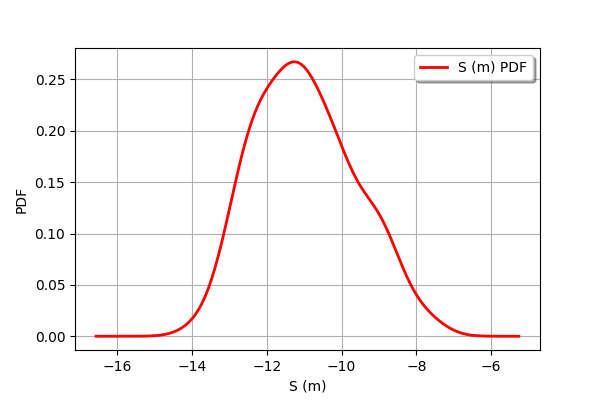

In [10]:
output_distribution = ot.KernelSmoothing().build(outputDesign)
output_distribution.drawPDF()

## Perform sensitivity analysis

In [11]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, True).generate()
outputDesign = model(inputDesign)

In [12]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
computed_first_order = sensitivityAnalysis.getFirstOrderIndices()
computed_total_order = sensitivityAnalysis.getTotalOrderIndices()

In [13]:
# Compare with exact results
print("Sample size : ", size)
# First order
# Compute absolute error (the LRE cannot be computed,
# because S can be zero)
print("Computed first order = ", computed_first_order)
print("Exact first order = ", exact_first_order)
# Total order
print("Computed total order = ", computed_total_order)
print("Exact total order = ", exact_total_order)

Sample size :  10000
Computed first order =  [0.371117,0.132323,0.260683,0.0122846,0.191458,0.0325634,0.00737934,0.00742311]
Exact first order =  [0.38,0.13,0.25,0,0.19,0.02,0,0]
Computed total order =  [0.413428,0.145408,0.243407,0.0047296,0.181729,0.0226387,5.62502e-06,0.000250136]
Exact total order =  [0.4,0.15,0.25,0.01,0.19,0.02,0,0]


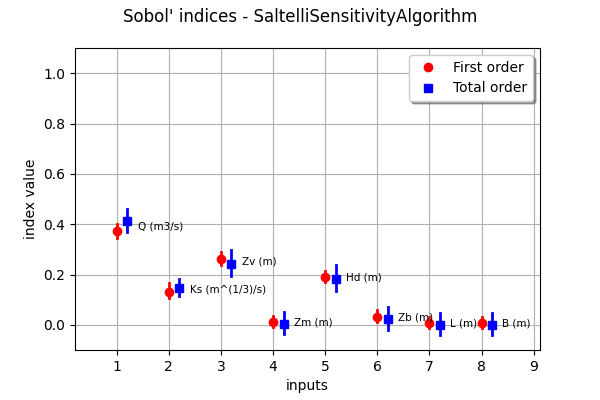

In [14]:
sensitivityAnalysis.draw()